In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from ml_data import get_ml_data, get_ml_data_all_env

In [50]:
pipe = Pipeline(
    [
        # ("scaler", StandardScaler()),
        # ("pca", PCA(n_components=2)),
        ("reg", DecisionTreeRegressor()),
    ]
)

In [51]:
def evaluate(env_n):
    labels = ["X", "Y"]
    X_train, X_test, y_train, y_test = get_ml_data(env_n, labels)
    pipe.fit(X_train, y_train)
    y_hat = pipe.predict(X_test)
    error = y_test - y_hat
    mean_error = np.mean(error)
    median_error = np.median(error)

    return mean_error, median_error, error

Env 1 mean error: 0.0007285746751427196
Env 1 median error: -0.0015136136264715105
Env 2 mean error: 0.04103982641113082
Env 2 median error: 9.915358300027766e-05


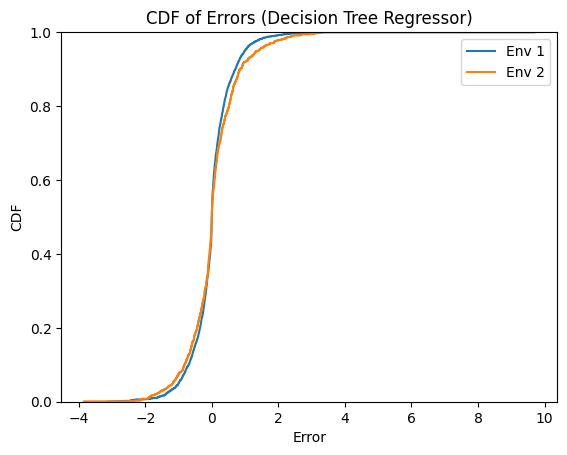

In [53]:
env1_mean_error, env1_median_error, env1_error = evaluate(1)
env2_mean_error, env2_median_error, env2_error = evaluate(2)

print(f"Env 1 mean error: {env1_mean_error}")
print(f"Env 1 median error: {env1_median_error}")
print(f"Env 2 mean error: {env2_mean_error}")
print(f"Env 2 median error: {env2_median_error}")

# average the error between X and Y coordinates
env1_error = env1_error.mean(axis=1)
env2_error = env2_error.mean(axis=1)

# Plot the CDF errors of both environments in the same plot, each with a different color
plt.figure()
sns.ecdfplot(env1_error)
sns.ecdfplot(env2_error)
plt.legend(["Env 1", "Env 2"])
plt.xlabel("Error")
plt.ylabel("CDF")
plt.title("CDF of Errors (Decision Tree Regressor)")
plt.show()